In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder

In [2]:
def apply_iqr_capping(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Primjena cappinga
    # Sve vrijednosti manje od donje granice postaju donja granica
    # Sve vrijednosti veće od gornje granice postaju gornja granica
    # round() zakružujemo sve vrijednosti
    capped_series = series.clip(lower=lower_bound, upper=upper_bound)
    return capped_series

In [3]:
zaposlenici = pd.read_csv("zaposlenici.csv")


In [4]:
zaposlenici

,Drzava,Starost,_jfhjbgjdb_,Odjel,Spol,Iskustvo_Godine,Placa_USD
0,SAD,22,Houston,Nabava,Z,1.0,5354.83
1,SAD,75,New York,Proizvodnja,M,35.0,3388.79
2,SAD,62,Houston,Nabava,Z,33.0,5892.16
3,SAD,48,Boston,Nabava,M,9.0,5827.25
4,SAD,22,Boston,Proizvodnja,Z,1.0,3673.74
...,...,...,...,...,...,...,...
510,SAD,51,Miami,Proizvodnja,NaN,23.0,5033.18
511,SAD,67,Houston,Prodaja,M,3.0,8078.86
512,SAD,24,Houston,Nabava,M,2.0,4879.26
513,SAD,74,Houston,Nabava,Z,16.0,6445.39


In [5]:
zaposlenici.describe()

,Starost,Iskustvo_Godine,Placa_USD
count,515.000000,507.000000,515.000000
mean,47.339806,10.613412,5598.921670
std,16.921973,10.296996,1866.144549
min,20.000000,-9.000000,2000.000000
25%,33.000000,3.000000,4026.645000
50%,46.000000,8.000000,5520.930000
75%,60.000000,15.000000,6736.745000
max,113.000000,68.000000,10000.000000


In [6]:
zaposlenici.rename(columns = {'_jfhjbgjdb_':'Grad'}, inplace = True)

In [7]:
zaposlenici

,Drzava,Starost,Grad,Odjel,Spol,Iskustvo_Godine,Placa_USD
0,SAD,22,Houston,Nabava,Z,1.0,5354.83
1,SAD,75,New York,Proizvodnja,M,35.0,3388.79
2,SAD,62,Houston,Nabava,Z,33.0,5892.16
3,SAD,48,Boston,Nabava,M,9.0,5827.25
4,SAD,22,Boston,Proizvodnja,Z,1.0,3673.74
...,...,...,...,...,...,...,...
510,SAD,51,Miami,Proizvodnja,NaN,23.0,5033.18
511,SAD,67,Houston,Prodaja,M,3.0,8078.86
512,SAD,24,Houston,Nabava,M,2.0,4879.26
513,SAD,74,Houston,Nabava,Z,16.0,6445.39


In [8]:
#### Prazne ćelije

In [9]:
zaposlenici.isna().sum()

Drzava              0
Starost             0
Grad                0
Odjel              11
Spol               10
Iskustvo_Godine     8
Placa_USD           0
dtype: int64

In [10]:
#### Koliko je različitih vrijednosti u koloni Država

In [11]:
zaposlenici["Drzava"].value_counts()

Drzava
SAD    515
Name: count, dtype: int64

In [12]:
#### Brišemo kolonu država

In [13]:
zaposlenici.drop(columns=["Drzava"], inplace=True)

In [14]:
zaposlenici

,Starost,Grad,Odjel,Spol,Iskustvo_Godine,Placa_USD
0,22,Houston,Nabava,Z,1.0,5354.83
1,75,New York,Proizvodnja,M,35.0,3388.79
2,62,Houston,Nabava,Z,33.0,5892.16
3,48,Boston,Nabava,M,9.0,5827.25
4,22,Boston,Proizvodnja,Z,1.0,3673.74
...,...,...,...,...,...,...
510,51,Miami,Proizvodnja,NaN,23.0,5033.18
511,67,Houston,Prodaja,M,3.0,8078.86
512,24,Houston,Nabava,M,2.0,4879.26
513,74,Houston,Nabava,Z,16.0,6445.39


In [15]:
zaposlenici["Grad"].value_counts()

Grad
New York       135
Houston        102
Los Angeles    100
Miami           94
Boston          84
Name: count, dtype: int64

In [16]:
### Odjel ima 11 praznih ćelija

In [17]:
zaposlenici["Odjel"].value_counts()

Odjel
Proizvodnja    184
Nabava          98
Marketing       97
Prodaja         84
proizvodnja     18
prrrodaja       10
nabava           6
marketing        4
prodaja          3
Name: count, dtype: int64

In [18]:
### Najčešće radno mjesto je u Proizvodnja te ćemo s tim podatkom popuniti prane ćelije

In [19]:
zaposlenici["Odjel"].mode()


0    Proizvodnja
Name: Odjel, dtype: object

In [20]:
zaposlenici["Odjel"].fillna(value = "Proizvodnja", inplace = True)
zaposlenici

C:\Users\Syntari\AppData\Local\Temp\ipykernel_21404\2947286761.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zaposlenici["Odjel"].fillna(value = "Proizvodnja", inplace = True)


,Starost,Grad,Odjel,Spol,Iskustvo_Godine,Placa_USD
0,22,Houston,Nabava,Z,1.0,5354.83
1,75,New York,Proizvodnja,M,35.0,3388.79
2,62,Houston,Nabava,Z,33.0,5892.16
3,48,Boston,Nabava,M,9.0,5827.25
4,22,Boston,Proizvodnja,Z,1.0,3673.74
...,...,...,...,...,...,...
510,51,Miami,Proizvodnja,NaN,23.0,5033.18
511,67,Houston,Prodaja,M,3.0,8078.86
512,24,Houston,Nabava,M,2.0,4879.26
513,74,Houston,Nabava,Z,16.0,6445.39


In [21]:
zaposlenici.isna().sum()

Starost             0
Grad                0
Odjel               0
Spol               10
Iskustvo_Godine     8
Placa_USD           0
dtype: int64

In [22]:
### Proizvodnja sada ima 195 redaka

In [23]:
zaposlenici["Odjel"].value_counts()

Odjel
Proizvodnja    195
Nabava          98
Marketing       97
Prodaja         84
proizvodnja     18
prrrodaja       10
nabava           6
marketing        4
prodaja          3
Name: count, dtype: int64

In [24]:
#### Spol također ima prazne ćelije (10)

In [25]:
zaposlenici["Spol"].mode()

0    Z
Name: Spol, dtype: object

In [26]:
zaposlenici["Spol"].fillna(value = "Z", inplace = True)

C:\Users\Syntari\AppData\Local\Temp\ipykernel_21404\3868669458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zaposlenici["Spol"].fillna(value = "Z", inplace = True)


In [27]:
zaposlenici

,Starost,Grad,Odjel,Spol,Iskustvo_Godine,Placa_USD
0,22,Houston,Nabava,Z,1.0,5354.83
1,75,New York,Proizvodnja,M,35.0,3388.79
2,62,Houston,Nabava,Z,33.0,5892.16
3,48,Boston,Nabava,M,9.0,5827.25
4,22,Boston,Proizvodnja,Z,1.0,3673.74
...,...,...,...,...,...,...
510,51,Miami,Proizvodnja,Z,23.0,5033.18
511,67,Houston,Prodaja,M,3.0,8078.86
512,24,Houston,Nabava,M,2.0,4879.26
513,74,Houston,Nabava,Z,16.0,6445.39


In [28]:
#### Sve ćelije su popunjene u koloni Spol

In [29]:
zaposlenici.isna().sum()

Starost            0
Grad               0
Odjel              0
Spol               0
Iskustvo_Godine    8
Placa_USD          0
dtype: int64

In [30]:
#### Kolona Iskustvo_Godine ima praznih ćelija kao i neke nelogičnosti s vrijednostima  -9

In [31]:
zaposlenici.describe()

,Starost,Iskustvo_Godine,Placa_USD
count,515.000000,507.000000,515.000000
mean,47.339806,10.613412,5598.921670
std,16.921973,10.296996,1866.144549
min,20.000000,-9.000000,2000.000000
25%,33.000000,3.000000,4026.645000
50%,46.000000,8.000000,5520.930000
75%,60.000000,15.000000,6736.745000
max,113.000000,68.000000,10000.000000


In [32]:
zaposlenici.sort_values(by = ["Iskustvo_Godine"])

,Starost,Grad,Odjel,Spol,Iskustvo_Godine,Placa_USD
506,35,Los Angeles,Proizvodnja,Z,-9.0,3628.97
189,43,Boston,Proizvodnja,Z,-8.0,3012.43
289,54,Los Angeles,Nabava,Z,-6.0,5391.29
174,42,Miami,Marketing,M,-6.0,4999.23
437,66,Houston,Marketing,Z,-2.0,6736.41
...,...,...,...,...,...,...
201,41,Houston,Proizvodnja,Z,NaN,3820.49
269,39,New York,Nabava,M,NaN,6122.90
276,66,Boston,Marketing,Z,NaN,5856.65
280,49,Los Angeles,Marketing,M,NaN,5194.29


(array([ 2.,  2.,  0.,  0.,  1.,  9., 42., 74., 36., 45., 34., 56., 33.,
        17., 28.,  7., 26., 11., 19.,  3., 11.,  7.,  8.,  3.,  4.,  2.,
         2.,  5.,  2.,  1.,  1.,  3.,  0.,  1.,  2.,  4.,  2.,  1.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-9.  , -7.46, -5.92, -4.38, -2.84, -1.3 ,  0.24,  1.78,  3.32,
         4.86,  6.4 ,  7.94,  9.48, 11.02, 12.56, 14.1 , 15.64, 17.18,
        18.72, 20.26, 21.8 , 23.34, 24.88, 26.42, 27.96, 29.5 , 31.04,
        32.58, 34.12, 35.66, 37.2 , 38.74, 40.28, 41.82, 43.36, 44.9 ,
        46.44, 47.98, 49.52, 51.06, 52.6 , 54.14, 55.68, 57.22, 58.76,
        60.3 , 61.84, 63.38, 64.92, 66.46, 68.  ]),
 <BarContainer object of 50 artists>)

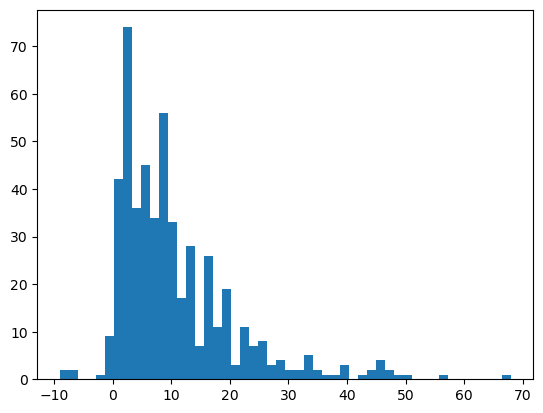

In [33]:
plt.hist(zaposlenici.Iskustvo_Godine, bins=50)

In [34]:
isna_values = zaposlenici[zaposlenici.isna().any(axis=1)]
isna_values

,Starost,Grad,Odjel,Spol,Iskustvo_Godine,Placa_USD
32,34,Miami,Nabava,M,NaN,4953.39
45,66,Houston,nabava,Z,NaN,6297.98
70,34,New York,Proizvodnja,M,NaN,3145.09
201,41,Houston,Proizvodnja,Z,NaN,3820.49
269,39,New York,Nabava,M,NaN,6122.90
276,66,Boston,Marketing,Z,NaN,5856.65
280,49,Los Angeles,Marketing,M,NaN,5194.29
292,39,Boston,Marketing,M,NaN,5926.27


In [35]:
zaposlenici["Iskustvo_Godine"].mean()

np.float64(10.613412228796845)

In [36]:
zaposlenici["Iskustvo_Godine"].median()

8.0

In [37]:
zaposlenici["Iskustvo_Godine"].fillna(value = 8.0, inplace = True)

C:\Users\Syntari\AppData\Local\Temp\ipykernel_21404\1357525139.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zaposlenici["Iskustvo_Godine"].fillna(value = 8.0, inplace = True)


In [38]:
isna_values2 = zaposlenici[zaposlenici.isna().any(axis=1)]
isna_values2

,Starost,Grad,Odjel,Spol,Iskustvo_Godine,Placa_USD


(array([ 2.,  2.,  0.,  0.,  1.,  9., 42., 74., 36., 45., 34., 64., 33.,
        17., 28.,  7., 26., 11., 19.,  3., 11.,  7.,  8.,  3.,  4.,  2.,
         2.,  5.,  2.,  1.,  1.,  3.,  0.,  1.,  2.,  4.,  2.,  1.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-9.  , -7.46, -5.92, -4.38, -2.84, -1.3 ,  0.24,  1.78,  3.32,
         4.86,  6.4 ,  7.94,  9.48, 11.02, 12.56, 14.1 , 15.64, 17.18,
        18.72, 20.26, 21.8 , 23.34, 24.88, 26.42, 27.96, 29.5 , 31.04,
        32.58, 34.12, 35.66, 37.2 , 38.74, 40.28, 41.82, 43.36, 44.9 ,
        46.44, 47.98, 49.52, 51.06, 52.6 , 54.14, 55.68, 57.22, 58.76,
        60.3 , 61.84, 63.38, 64.92, 66.46, 68.  ]),
 <BarContainer object of 50 artists>)

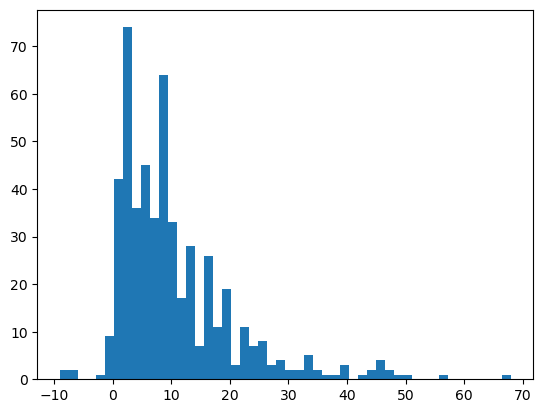

In [39]:
plt.hist(zaposlenici.Iskustvo_Godine, bins=50)

In [40]:
zaposlenici.sort_values(by = ["Iskustvo_Godine"])

,Starost,Grad,Odjel,Spol,Iskustvo_Godine,Placa_USD
506,35,Los Angeles,Proizvodnja,Z,-9.0,3628.97
189,43,Boston,Proizvodnja,Z,-8.0,3012.43
289,54,Los Angeles,Nabava,Z,-6.0,5391.29
174,42,Miami,Marketing,M,-6.0,4999.23
437,66,Houston,Marketing,Z,-2.0,6736.41
...,...,...,...,...,...,...
489,65,Boston,nabava,M,47.0,6607.01
112,75,Boston,Prodaja,M,49.0,9979.05
13,71,Houston,Nabava,M,50.0,7901.27
88,74,Los Angeles,Proizvodnja,M,56.0,3451.67


In [41]:
#### Još uvijek imamo negativne vrijednosti za Iskustvo_Godine....
#### Zbog pretpostavke da je unos bio pogrešan (-9), nisam se odlučio za srednju vrijednost ili medijan,
#### nego za apsolutnu vrijednost koja pretvara vrijednosti u pozitivne 

In [42]:
zaposlenici['Iskustvo_Godine'] = zaposlenici['Iskustvo_Godine'].abs()

In [43]:
zaposlenici.sort_values(by = ["Iskustvo_Godine"])

,Starost,Grad,Odjel,Spol,Iskustvo_Godine,Placa_USD
38,20,Miami,Prodaja,M,0.0,8229.05
440,36,Houston,Nabava,M,0.0,5115.68
382,21,Boston,prrrodaja,Z,0.0,6303.75
363,20,New York,Marketing,M,0.0,5351.39
261,22,Miami,Marketing,Z,0.0,6914.66
...,...,...,...,...,...,...
42,66,Los Angeles,Proizvodnja,Z,47.0,5599.76
112,75,Boston,Prodaja,M,49.0,9979.05
13,71,Houston,Nabava,M,50.0,7901.27
88,74,Los Angeles,Proizvodnja,M,56.0,3451.67


In [44]:
#### Potrebno je riješiti vrijednosti koje imaju vrijednosti 0.0

In [45]:
medijan = zaposlenici[zaposlenici['Iskustvo_Godine'] > 0]['Iskustvo_Godine'].median()

In [46]:
zaposlenici.loc[zaposlenici['Iskustvo_Godine'] == 0.0, 'Iskustvo_Godine'] = medijan

In [47]:
#### Grafički prikaz

(array([88., 29., 60., 23., 34., 75., 15., 35., 12., 16., 24.,  9., 23.,
         7.,  3., 11.,  7.,  8.,  3., 33.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ,
        16.4, 17.8, 19.2, 20.6, 22. , 23.4, 24.8, 26.2, 27.6, 29. ]),
 <BarContainer object of 20 artists>)

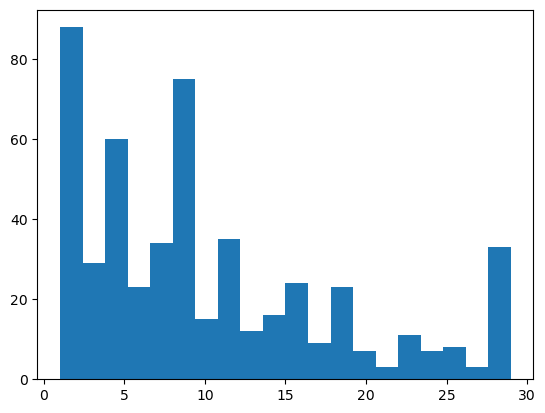

In [72]:
plt.hist(zaposlenici.Iskustvo_Godine, bins=20)

In [49]:
#### IQR metoda

In [50]:
for col in ['Iskustvo_Godine']:
    zaposlenici[col] = apply_iqr_capping(zaposlenici[col])

In [51]:
#### Stanje nakon IQR metode

(array([88., 29., 60., 23., 34., 75., 15., 35., 12., 16., 24.,  9., 23.,
         7.,  3., 11.,  7.,  8.,  3., 33.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ,
        16.4, 17.8, 19.2, 20.6, 22. , 23.4, 24.8, 26.2, 27.6, 29. ]),
 <BarContainer object of 20 artists>)

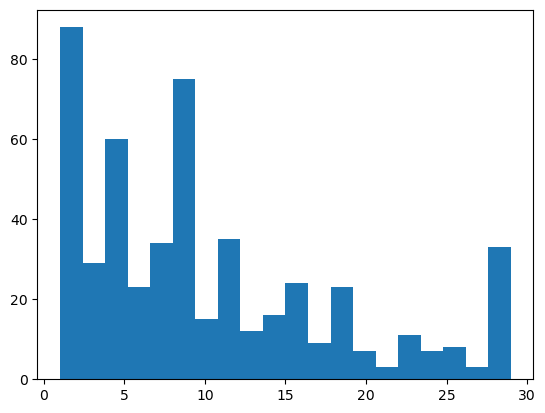

In [52]:
plt.hist(zaposlenici.Iskustvo_Godine, bins=20)

In [53]:
zaposlenici.corr(numeric_only=True)

,Starost,Iskustvo_Godine,Placa_USD
Starost,1.000000,0.586445,0.056749
Iskustvo_Godine,0.586445,1.000000,0.117955
Placa_USD,0.056749,0.117955,1.000000


In [54]:
#### HeatMap 

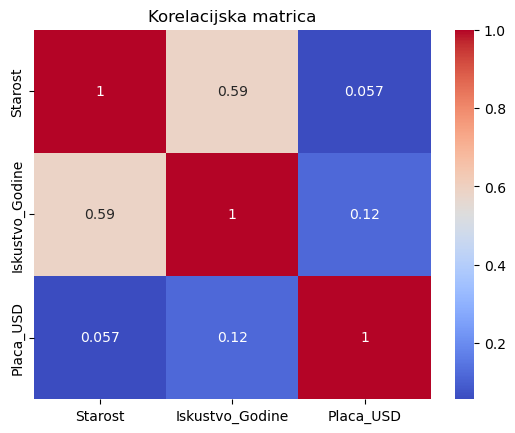

In [55]:
sns.heatmap(zaposlenici.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelacijska matrica')
plt.show()

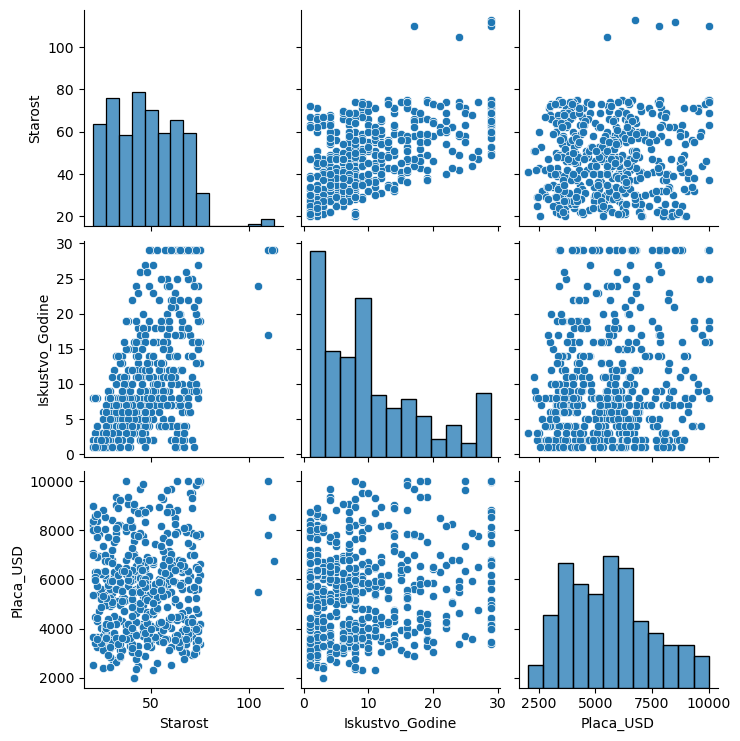

In [56]:
sns.pairplot(zaposlenici)

In [57]:
### Ostala je još i Starost koja ima outliere

(array([16., 17., 14., 20., 23., 20., 21., 10., 13., 21., 25., 26., 17.,
        16., 17., 20., 17., 12., 21., 13., 19., 12., 12., 17., 19., 12.,
        15., 15., 11., 19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  2.]),
 array([ 20.  ,  21.86,  23.72,  25.58,  27.44,  29.3 ,  31.16,  33.02,
         34.88,  36.74,  38.6 ,  40.46,  42.32,  44.18,  46.04,  47.9 ,
         49.76,  51.62,  53.48,  55.34,  57.2 ,  59.06,  60.92,  62.78,
         64.64,  66.5 ,  68.36,  70.22,  72.08,  73.94,  75.8 ,  77.66,
         79.52,  81.38,  83.24,  85.1 ,  86.96,  88.82,  90.68,  92.54,
         94.4 ,  96.26,  98.12,  99.98, 101.84, 103.7 , 105.56, 107.42,
        109.28, 111.14, 113.  ]),
 <BarContainer object of 50 artists>)

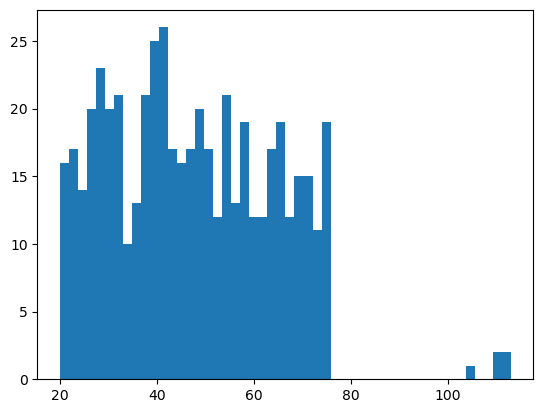

In [58]:
plt.hist(zaposlenici.Starost, bins=50)

In [61]:
zaposlenici.sort_values(by = ["Starost"])

,Starost,Grad,Odjel,Spol,Iskustvo_Godine,Placa_USD
38,20,Miami,Prodaja,M,8.0,8229.05
320,20,Houston,Prodaja,Z,1.0,8000.88
363,20,New York,Marketing,M,8.0,5351.39
400,20,Houston,Proizvodnja,M,2.0,3663.97
159,20,Boston,Prodaja,Z,8.0,8975.21
...,...,...,...,...,...,...
487,105,Boston,Nabava,M,24.0,5490.98
291,110,Los Angeles,Nabava,Z,17.0,7822.19
218,110,Houston,proizvodnja,Z,29.0,10000.00
486,112,Los Angeles,Nabava,Z,29.0,8524.24


In [74]:
zaposlenici[zaposlenici['Starost'] > 65].value_counts()

Starost  Grad         Odjel        Spol  Iskustvo_Godine  Placa_USD
73       New York     Marketing    Z     20.0             6499.03      2
66       Boston       Marketing    Z     8.0              5856.65      1
         Houston      Nabava       Z     2.0              4654.71      1
                      Marketing    Z     2.0              6736.41      1
                      Proizvodnja  Z     10.0             3049.41      1
                                                                      ..
105      Boston       Nabava       M     24.0             5490.98      1
110      Houston      proizvodnja  Z     29.0             10000.00     1
         Los Angeles  Nabava       Z     17.0             7822.19      1
112      Los Angeles  Nabava       Z     29.0             8524.24      1
113      Miami        Nabava       M     29.0             6737.08      1
Name: count, Length: 88, dtype: int64

In [71]:
zaposlenici['Odjel'].value_counts()

Odjel
Proizvodnja    195
Nabava          98
Marketing       97
Prodaja         84
proizvodnja     18
prrrodaja       10
nabava           6
marketing        4
prodaja          3
Name: count, dtype: int64

In [ ]:
zaposlenici["Odjel"]

In [ ]:
zaposlenici["Odjel"].replace({-654.0: 6540.0}, inplace=True)

In [59]:
#### IQR metoda za starost

In [60]:
#### nakon IQR metode